# Public Transport Commute Pattern Analysis
### An Exploratory Data Analysis Project

**Objective:**  
To analyze public transport commute patterns across cities to understand peak hours, transport usage, and factors affecting commute duration.


## 1. Introduction

Public transportation plays a crucial role in urban mobility, especially in growing cities.
Understanding commute patterns helps in improving route planning, peak-hour management,
and passenger experience.

This project performs an exploratory analysis on public transport commute data to
identify trends related to transport modes, peak hours, and commute durations.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = pd.read_excel(r"C:\Users\Admin\Documents\public_transport_commute_data.xlsx")

## 2. Dataset Description

The dataset contains individual commute records with attributes such as:
- City and transport mode
- Route and time of travel
- Distance and commute duration
- Passenger type and ticket category

Each row represents a single commute instance.

In [14]:
df.head()

,Commute_ID,Date,Day,City,Transport_Mode,Route,Departure_Time,Peak_Hour,Distance_km,Commute_Duration_Min,Ticket_Type,Passenger_Type
0,C001,2024-01-01,Monday,Pune,Bus,Kothrud-Shivajinagar,08:15:00,Yes,12.0,45.0,Monthly Pass,Student
1,C002,2024-01-01,Monday,Pune,Metro,Hinjewadi-Vanaz,09:00:00,Yes,18.0,40.0,Single Ticket,Working Professional
2,C003,2024-01-02,Tuesday,Nashik,Bus,College Road-Old Nashik,10:30:00,No,8.0,30.0,Single Ticket,Student
3,C004,2024-01-02,Tuesday,Pune,Bus,Swargate-Katraj,18:15:00,Yes,14.0,50.0,Daily Pass,Working Professional
4,C005,2024-01-03,Wednesday,Nashik,Auto,MG Road-CBS,11:00:00,No,5.0,20.0,Pay Per Ride,General


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Commute_ID            100 non-null    object        
 1   Date                  100 non-null    datetime64[ns]
 2   Day                   100 non-null    object        
 3   City                  100 non-null    object        
 4   Transport_Mode        100 non-null    object        
 5   Route                 100 non-null    object        
 6   Departure_Time        100 non-null    object        
 7   Peak_Hour             100 non-null    object        
 8   Distance_km           100 non-null    float64       
 9   Commute_Duration_Min  100 non-null    float64       
 10  Ticket_Type           100 non-null    object        
 11  Passenger_Type        100 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 9.5+ KB


In [16]:
df.describe()

,Date,Distance_km,Commute_Duration_Min
count,100,100.000000,100.000000
mean,2024-01-07 12:43:12,10.467557,31.362959
min,2024-01-01 00:00:00,5.000000,20.000000
25%,2024-01-03 00:00:00,9.139970,27.552558
50%,2024-01-07 00:00:00,9.985391,30.495551
75%,2024-01-11 06:00:00,10.733074,33.190712
max,2024-01-15 00:00:00,20.000000,52.000000
std,NaN,2.877697,5.607758


## 3. Data Cleaning and Preparation

Before analysis, the dataset was checked for:
- Missing values
- Incorrect data types
- Consistency in categorical variables

In [17]:
df.isnull().sum()

Commute_ID              0
Date                    0
Day                     0
City                    0
Transport_Mode          0
Route                   0
Departure_Time          0
Peak_Hour               0
Distance_km             0
Commute_Duration_Min    0
Ticket_Type             0
Passenger_Type          0
dtype: int64

No major missing values were observed. Date and time columns were converted
to appropriate formats for time-based analysis.


## 4. Exploratory Data Analysis

### 4.1 Transport Mode Usage


In [18]:
transport_count = df['Transport_Mode'].value_counts()
print(transport_count)

Transport_Mode
Bus      54
Metro    27
Auto     19
Name: count, dtype: int64


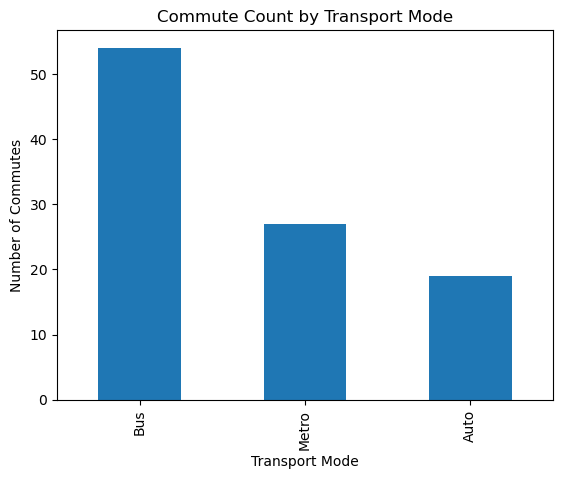

In [22]:
transport_count.plot(kind='bar')
plt.title("Commute Count by Transport Mode")
plt.xlabel("Transport Mode")
plt.ylabel("Number of Commutes")
plt.show()

Buses and metro services form the majority of commutes, indicating their
importance in daily urban transportation.


### 4.2 Peak Hour vs Non-Peak Commutes

In [20]:
peak_analysis = df.groupby('Peak_Hour')['Commute_Duration_Min'].mean()
print(peak_analysis)

Peak_Hour
No     29.817064
Yes    32.577590
Name: Commute_Duration_Min, dtype: float64


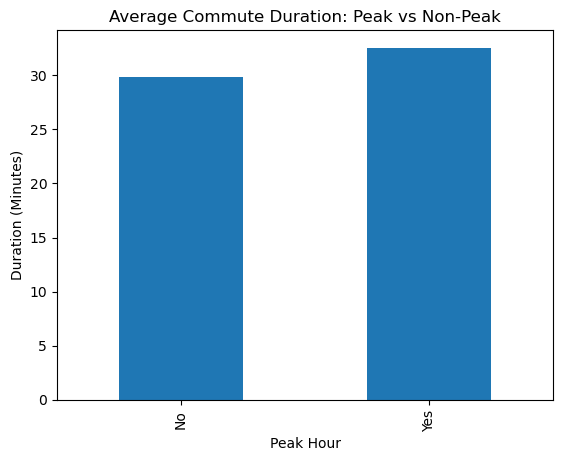

In [25]:
peak_analysis.plot(kind='bar')
plt.title("Average Commute Duration: Peak vs Non-Peak")
plt.xlabel("Peak Hour")
plt.ylabel("Duration (Minutes)")
plt.show()

A significant portion of commutes occur during peak hours,
highlighting congestion and time-sensitivity in urban travel.

### 4.3 Commute Duration by Transport Mode


In [19]:
avg_duration = df.groupby('Transport_Mode')['Commute_Duration_Min'].mean()
print(avg_duration)

Transport_Mode
Auto     27.702266
Bus      31.838924
Metro    32.987072
Name: Commute_Duration_Min, dtype: float64


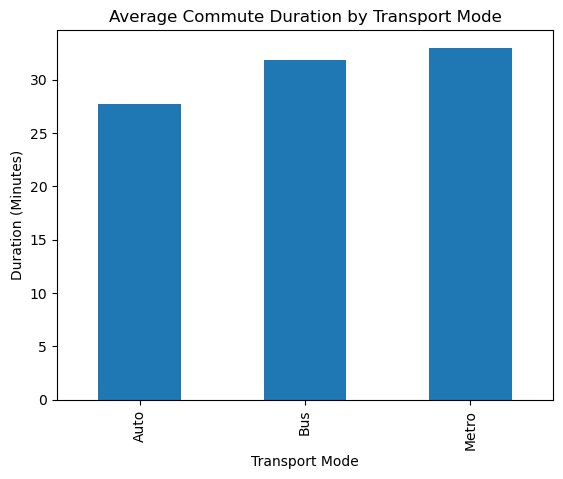

In [30]:
avg_duration.plot(kind='bar')
plt.title("Average Commute Duration by Transport Mode")
plt.xlabel("Transport Mode")
plt.ylabel("Duration (Minutes)")
plt.show()

Metro services show comparatively lower average commute duration,
suggesting higher efficiency for longer routes.


## 5. City-wise Commute Patterns


In [21]:
city_commute = df.groupby('City')['Commute_Duration_Min'].mean()
print(city_commute)

City
Nashik    29.818339
Pune      32.350502
Name: Commute_Duration_Min, dtype: float64


Commute duration varies across cities due to route length,
transport infrastructure, and traffic conditions.


## 6. Key Insights

- Peak hours account for a large share of daily commutes, indicating
  high pressure on transport infrastructure.
- Metro transport shows better time efficiency compared to road-based modes.
- Longer distances do not always result in longer commute times,
  suggesting route optimization benefits.
- Working professionals dominate peak-hour usage, while students show
  more flexible travel patterns.


## 7. Limitations

- Dataset size is limited and may not represent all routes.
- External factors such as weather and traffic incidents were not included.
- Analysis is descriptive and does not involve prediction.


## 8. Conclusion and Future Scope

The analysis provides insights into public transport usage patterns
and highlights the importance of peak-hour management.

Future work could include:
- Larger datasets
- Integration with real-time traffic data
- Predictive modeling for commute duration


In [26]:
df.to_csv("cleaned_public_transport_data.csv", index=False)